**Covid_19_analysis_python_project**

In [ ]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Mount google drive with colab
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Read data in CSV format
df1=pd.read_csv("/content/drive/MyDrive/Python/raw_data.csv")
df2=pd.read_csv("/content/drive/MyDrive/Python/transformed_data.csv")


In [ ]:
#reset_index() function will create a new column named as index
#use inplace to save the index as a new column

df1.reset_index(inplace=True)

In [ ]:
df2.reset_index(inplace=True)

In [ ]:
#Merge two dataframes into a single dataframes
final_df=df1.merge(df2,how='left',on='index')

#OR
#final_df=pd.merge(df1,df2,how="left",left_index=True,right_index=True)

**1. Prepare data for analysis**

**Data Exploration**

In [ ]:
# Preview first 5 rows of data set
final_df.head()

,index,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,...,Unnamed: 13,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498,...,7.497754494,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754
1,1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498,...,7.497754494,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754
2,2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498,...,7.497754494,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754
3,3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498,...,7.497754494,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754
4,4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498,...,7.497754494,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754


In [ ]:
# Preview first 5 rows of data set
final_df.tail()

,index,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,...,Unnamed: 13,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
50413,50413,ZWE,Zimbabwe,2020-10-15,8055.0,231.0,76.85,14862927,1899.775,0.535,...,7.549490737,ZWE,Zimbabwe,2020-10-15,0.535,8.994048,5.442418,4.341855,16.514381,7.549491
50414,50414,ZWE,Zimbabwe,2020-10-16,8075.0,231.0,76.85,14862927,1899.775,0.535,...,7.549490737,ZWE,Zimbabwe,2020-10-16,0.535,8.996528,5.442418,4.341855,16.514381,7.549491
50415,50415,ZWE,Zimbabwe,2020-10-17,8099.0,231.0,76.85,14862927,1899.775,0.535,...,7.549490737,ZWE,Zimbabwe,2020-10-17,0.535,8.999496,5.442418,4.341855,16.514381,7.549491
50416,50416,ZWE,Zimbabwe,2020-10-18,8110.0,231.0,76.85,14862927,1899.775,0.535,...,7.549490737,ZWE,Zimbabwe,2020-10-18,0.535,9.000853,5.442418,4.341855,16.514381,7.549491
50417,50417,ZWE,Zimbabwe,2020-10-19,8147.0,231.0,76.85,14862927,1899.775,0.535,...,7.549490737,ZWE,Zimbabwe,2020-10-19,0.535,9.005405,5.442418,4.341855,16.514381,7.549491


In [ ]:
#Shape of the data sets(Total number of rows and columns entries)
print(df1.shape)
print(df2.shape)

(50418, 15)
(50418, 10)


In [ ]:
#Datasets information
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    50418 non-null  int64  
 1   iso_code                 50418 non-null  object 
 2   location                 50418 non-null  object 
 3   date                     50418 non-null  object 
 4   total_cases              47324 non-null  float64
 5   total_deaths             39228 non-null  float64
 6   stringency_index         43292 non-null  float64
 7   population               50418 non-null  int64  
 8   gdp_per_capita           44706 non-null  float64
 9   human_development_index  44216 non-null  float64
 10  Unnamed: 9               50418 non-null  object 
 11  Unnamed: 10              50418 non-null  object 
 12  Unnamed: 11              50418 non-null  object 
 13  Unnamed: 12              50418 non-null  float64
 14  Unnamed: 13           

**Data** **Cleaning**

In [ ]:
#Remove unnamed and repetative columns
final_df.drop(['Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13','CODE','COUNTRY','DATE','HDI','TC','TD','STI','POP','GDPCAP'],axis=1,inplace=True)

In [ ]:
final_df

,index,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
0,0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.00,38928341,1803.987,0.498
1,1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.00,38928341,1803.987,0.498
2,2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.00,38928341,1803.987,0.498
3,3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.00,38928341,1803.987,0.498
4,4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.00,38928341,1803.987,0.498
...,...,...,...,...,...,...,...,...,...,...
50413,50413,ZWE,Zimbabwe,2020-10-15,8055.0,231.0,76.85,14862927,1899.775,0.535
50414,50414,ZWE,Zimbabwe,2020-10-16,8075.0,231.0,76.85,14862927,1899.775,0.535
50415,50415,ZWE,Zimbabwe,2020-10-17,8099.0,231.0,76.85,14862927,1899.775,0.535
50416,50416,ZWE,Zimbabwe,2020-10-18,8110.0,231.0,76.85,14862927,1899.775,0.535


In [ ]:
#Check the data types
final_df.dtypes

index                        int64
iso_code                    object
location                    object
date                        object
total_cases                float64
total_deaths               float64
stringency_index           float64
population                   int64
gdp_per_capita             float64
human_development_index    float64
dtype: object

In [ ]:
#Change the datatype of date(Object to Date)
final_df.date=final_df.date.astype('datetime64')

In [ ]:
#Date has a datetime64 as a datatype now
final_df.dtypes

index                               int64
iso_code                           object
location                           object
date                       datetime64[ns]
total_cases                       float64
total_deaths                      float64
stringency_index                  float64
population                          int64
gdp_per_capita                    float64
human_development_index           float64
dtype: object

<Axes: ylabel='Density'>

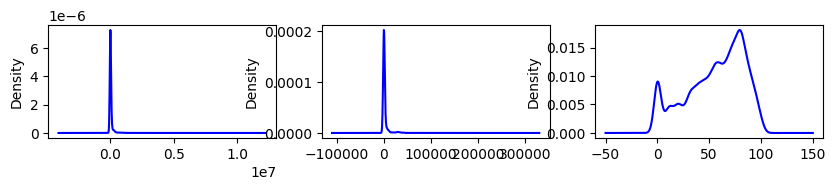

In [ ]:
plt.subplot(3,3,1)
final_df[("total_cases")].plot(kind = "kde",color = "b" ,figsize = (10,5))

plt.subplot(3,3,2)
final_df[("total_deaths")].plot(kind = "kde",color = "b" ,figsize = (10,5))

plt.subplot(3,3,3)
final_df[("stringency_index")].plot(kind = "kde",color = "b" ,figsize = (10,5))



#final_df["total_deaths"].plot(kind = "kde",color = "r" ,figsize = (10,5))

<Axes: ylabel='Density'>

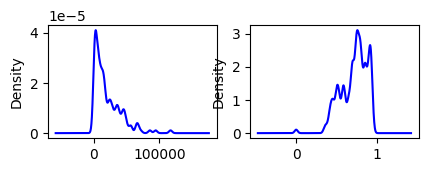

In [ ]:
plt.subplot(3,4,1)
final_df[("gdp_per_capita")].plot(kind = "kde",color = "b" ,figsize = (10,5))

plt.subplot(3,4,2)
final_df[("human_development_index")].plot(kind = "kde",color = "b" ,figsize = (10,5))

In [ ]:
#Count number of null values in each column
final_df.isnull().sum()

index                          0
iso_code                       0
location                       0
date                           0
total_cases                 3094
total_deaths               11190
stringency_index            7126
population                     0
gdp_per_capita              5712
human_development_index     6202
dtype: int64

In [ ]:
#Find mean of columns that contains null values
final_df['stringency_index'].mean()

56.16202208260186

In [ ]:
final_df['gdp_per_capita'].mean()

20818.706239788844

In [ ]:
final_df['human_development_index'].mean()

0.7201385245160123

In [ ]:
#replace null values
final_df['total_cases']=final_df['total_cases'].fillna(0)
final_df['total_deaths']=final_df['total_deaths'].fillna(0)
final_df['stringency_index']=final_df['stringency_index'].fillna(56.16202208260186)
final_df['gdp_per_capita']=final_df['gdp_per_capita'].fillna(20818.706239788844)
final_df['human_development_index']=final_df['human_development_index'].fillna(0.7201385245160123)


In [ ]:
#No more null values
final_df.isnull().sum()

index                      0
iso_code                   0
location                   0
date                       0
total_cases                0
total_deaths               0
stringency_index           0
population                 0
gdp_per_capita             0
human_development_index    0
dtype: int64

In [ ]:
#Find number of unique values in each column
final_df.nunique()


index                      50418
iso_code                     210
location                     210
date                         294
total_cases                19172
total_deaths                6374
stringency_index             171
population                   210
gdp_per_capita               185
human_development_index      158
dtype: int64

In [ ]:
#OR

print(final_df.iso_code.nunique(dropna=True))
print(final_df.location.nunique(dropna=True))
print(final_df.date.nunique(dropna=True))
print(final_df.total_cases.nunique(dropna=True))
print(final_df.total_deaths.nunique(dropna=True))
print(final_df.stringency_index.nunique(dropna=True))
print(final_df.population.nunique(dropna=True))
print(final_df.gdp_per_capita.nunique(dropna=True))
print(final_df.human_development_index .nunique(dropna=True))





210
210
294
19172
6374
171
210
185
158


In [ ]:
#Find number duplicate of data
final_df.duplicated().sum()

0

In [ ]:
#No duplicate row found
final_df[final_df.duplicated(keep=False)]

,index,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index


In [ ]:
#Let's save cleaned data to new csv file
final_df.to_csv('/content/drive/MyDrive/Python/covid_19_analysis_final.csv')

In [ ]:
df=final_df.copy()

**2. Analyzing the Spread of Covid-19**

Descriptive analysis

In [ ]:
#Descriptive statistics summary
df.describe(include='all')

<ipython-input-31-41a34aa7a59c>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,index,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
count,50418.000000,50418,50418,50418,5.041800e+04,50418.000000,50418.000000,5.041800e+04,50418.000000,50418.000000
unique,NaN,210,210,294,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,AFG,Afghanistan,2020-08-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,294,294,209,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,2019-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2020-10-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,25208.500000,NaN,NaN,NaN,6.215560e+04,2317.646555,56.162022,4.251601e+07,20818.706240,0.720139
std,14554.567273,NaN,NaN,NaN,3.922702e+05,12267.528868,25.512844,1.564607e+08,19248.613445,0.150680
min,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,8.090000e+02,661.240000,0.000000
25%,12604.250000,NaN,NaN,NaN,6.400000e+01,1.000000,41.670000,1.399491e+06,6253.104000,0.640000


1. Top 10 Countries with Highest Covid Cases

In [ ]:
#Group the data by countries(location) and find sum of covid_cases
countrywise_total_cases = df.groupby('location').sum()['total_cases']

# Descending order sorting by countries
countrywise_total_cases_sorted = countrywise_total_cases.sort_values(ascending=False)

# Get the top 10 coutnries with the highest covid cases
top_10_record = countrywise_total_cases_sorted.head(10)

print(top_10_record)

location
United States     746014098.0
Brazil            425704517.0
India             407771615.0
Russia            132888951.0
Peru               74882695.0
Mexico             74347548.0
Spain              73717676.0
South Africa       63027659.0
Colombia           60543682.0
United Kingdom     59475032.0
Name: total_cases, dtype: float64


<ipython-input-32-ff481e440b02>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  countrywise_total_cases = df.groupby('location').sum()['total_cases']


2. Top 10 Countries with Lowest Covid Cases

In [ ]:
#Group the data by countries(location) and find sum of covid_cases)
countrywise_total_cases = df.groupby('location').sum()['total_cases']

# ascending order sorting by countries
countrywise_total_cases_sorted = countrywise_total_cases.sort_values(ascending=True)

# Get the top 10 coutnries with the lowest covid cases
lowestcases_top_10_record = countrywise_total_cases_sorted.head(10)

print(lowestcases_top_10_record)

location
Hong Kong                   0.0
Solomon Islands            11.0
Anguilla                  614.0
Montserrat               2383.0
Vatican                  2415.0
Falkland Islands         2467.0
Greenland                2678.0
Saint Kitts and Nevis    3246.0
Dominica                 3977.0
Laos                     4039.0
Name: total_cases, dtype: float64


<ipython-input-33-dfb0041502eb>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  countrywise_total_cases = df.groupby('location').sum()['total_cases']


3. Total number of deaths among the countries with the highest number of COVID-19 cases

In [ ]:
# sort the DataFrame by the number of cases in descending order
sorted_by_total_cases = df.sort_values(by='total_cases', ascending=False)

# select top 10 countries
top_countries = sorted_by_total_cases.head(10)

# count total number of deaths for those 10 countries
total_deaths = top_countries['total_deaths'].sum()

print(total_deaths)


2166056.0


4.Percentage of total deaths and total cases among all the
countries with the highest number of covid-19 cases

In [ ]:
#sort the DataFrame by the number of cases in descending order
sorted_by_total_cases=df.sort_values(by='total_cases',ascending=False)

#Sum of cases and deaths
total_cases=df['total_cases'].sum()
total_deaths=df['total_deaths'].sum()

#Percentage of total deaths and total cases
total_deaths_percent=(total_deaths / total_cases)*100
total_cases_percent=100-total_deaths_percent

print(f"Percentage of total deaths: {total_deaths_percent:.2f}%")
print(f"Percentage of total cases: {total_cases_percent:.2f}%")



Percentage of total deaths: 3.73%
Percentage of total cases: 96.27%


5.calculate the death rate of Covid-19 cases

In [ ]:
#calculate death rate
df['death_rate']=(df['total_deaths'] /df['total_cases'])*100
print(df['death_rate'])

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
50413    2.867784
50414    2.860681
50415    2.852204
50416    2.848335
50417    2.835400
Name: death_rate, Length: 50418, dtype: float64


6.Country Wise stringency index

In [ ]:
#count country wise stringency index
stringency_indx=df.groupby('location').sum() ['stringency_index']
#stringency_indx_sorted=stringency_indx.sort_values(ascending=True)
print(stringency_indx)

location
Afghanistan    14545.478309
Albania        15082.248309
Algeria        16634.946177
Andorra         9873.354265
Angola         16263.852243
                   ...     
Venezuela      18195.348088
Vietnam        16644.472022
Yemen           8566.874155
Zambia         10573.018309
Zimbabwe       16864.760000
Name: stringency_index, Length: 210, dtype: float64


<ipython-input-39-c964bf656b15>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stringency_indx=df.groupby('location').sum() ['stringency_index']


7. Date Wise Corona Cases.

In [ ]:
#count date wise corona cases
corona_cases=df.groupby('date').sum() ['total_cases']
print(corona_cases)

date
2019-12-31          27.0
2020-01-01          27.0
2020-01-02          27.0
2020-01-03          44.0
2020-01-04          44.0
                 ...    
2020-10-15    38643686.0
2020-10-16    39040423.0
2020-10-17    39320884.0
2020-10-18    39459989.0
2020-10-19    38843583.0
Name: total_cases, Length: 294, dtype: float64


<ipython-input-40-d5e95e7c01e7>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  corona_cases=df.groupby('date').sum() ['total_cases']


8. Monthly Death Vs Corona Cases.

In [ ]:
#count month wise corona deaths
df['month'] = pd.DatetimeIndex(df['date']).month
corona_deaths=df.groupby('month').sum() ['total_deaths']
print(corona_deaths)

#count monthly corona cases
df['month']=pd.DatetimeIndex(df['date']).month
corona_cases=df.groupby('month').sum() ['total_cases']
print(corona_cases)

month
1          883.0
2        45060.0
3       354135.0
4      4075764.0
5      9412362.0
6     13074499.0
7     18090217.0
8     23632021.0
9     27975297.0
10    20190866.0
12           0.0
Name: total_deaths, dtype: float64
month
1         38431.0
2       1621911.0
3       8463009.0
4      60557941.0
5     141060938.0
6     241865375.0
7     425205604.0
8     665177183.0
9     888284228.0
10    701486309.0
12           27.0
Name: total_cases, dtype: float64


<ipython-input-42-8451f9761e45>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  corona_deaths=df.groupby('month').sum() ['total_deaths']
<ipython-input-42-8451f9761e45>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  corona_cases=df.groupby('month').sum() ['total_cases']


9. Country Wise First Case.

In [ ]:
#creating filter to exclude 0 cases
filter = df[df['total_cases'] > 0]

# Group data by country and find date when first case was found in each country
countrywise_first_case = filter.groupby('location')['date'].min().reset_index()

# Print the result
print(countrywise_first_case)





        location       date
0    Afghanistan 2020-02-25
1        Albania 2020-03-09
2        Algeria 2020-02-26
3        Andorra 2020-03-03
4         Angola 2020-03-22
..           ...        ...
204    Venezuela 2020-03-15
205      Vietnam 2020-01-24
206        Yemen 2020-04-10
207       Zambia 2020-03-19
208     Zimbabwe 2020-03-21

[209 rows x 2 columns]


10. Worldwide Total Cases Vs Total Death

In [ ]:
#Worldwide Sum of corona cases and deaths
total_cases_all=df['total_cases'].sum()
total_deaths_all=df['total_deaths'].sum()

print(f"Worldwide total cases are: {total_cases_all:.0f}")
print(f"Worldwide total deaths are: {total_deaths_all:.0f}")




Worldwide total cases are: 3133760956
Worldwide total deaths are: 116851104


**3. analyze the impacts of covid-19 on the economy**

a) GDP per capita is the primary factor for analyzing the
economic slowdowns caused due to the outbreak of
covid-19.

From the below graph it can be seen that there was a significanr changes in GDP per capita from the month of January to March when the Covid-19 was at the peak thereafter,it remained constant.

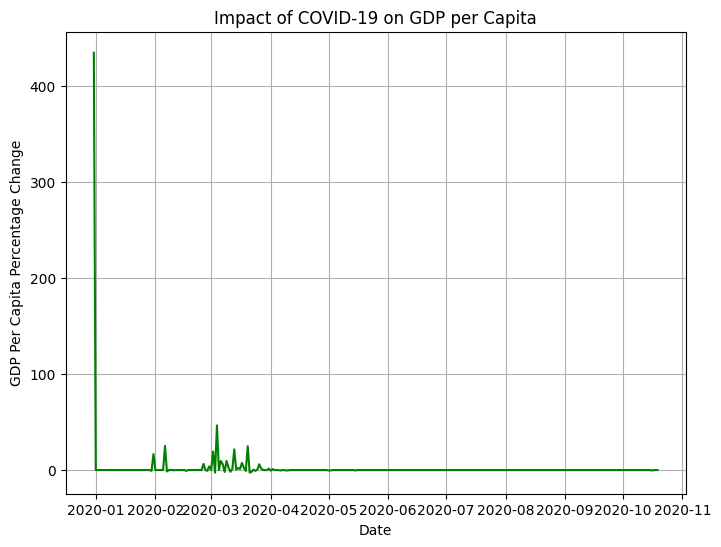

In [ ]:
df['gdp_per_capita_Pct_Change'] = (df['gdp_per_capita'] - df['gdp_per_capita'].shift(1)) / df['gdp_per_capita'].shift(1) * 100

# Create a summary to see the impact of COVID-19 on GDP per capita
summary = df.groupby('date')['gdp_per_capita_Pct_Change'].mean().reset_index()


# Plot the impact over time

plt.figure(figsize=(8, 6))
plt.plot(summary['date'], summary['gdp_per_capita_Pct_Change'],color="Green")
plt.title('Impact of COVID-19 on GDP per Capita')
plt.xlabel('Date')
plt.ylabel('GDP Per Capita Percentage Change')
plt.grid()
plt.show()

b)GDP per capita during the rise in the cases of covid-19

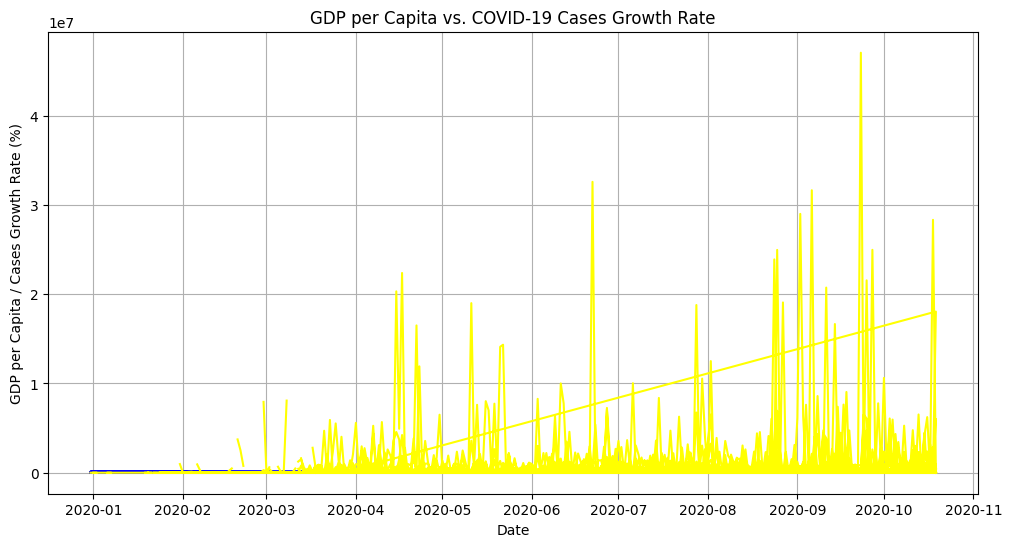

In [ ]:
# Sort the data by year
data = df.sort_values(by='date')

# Calculate the percentage change in COVID-19 cases from the previous year
df['Cases Growth Rate'] = data['total_cases'].pct_change()

# Plot GDP per capita and COVID-19 cases growth rate over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['gdp_per_capita'], label='GDP per Capita', color='blue')
plt.plot(df['date'], df['Cases Growth Rate'] * 100, label='Cases Growth Rate (%)', color='yellow')
plt.xlabel('Date')
plt.ylabel('GDP per Capita / Cases Growth Rate (%)')
plt.title('GDP per Capita vs. COVID-19 Cases Growth Rate')
plt.grid()
plt.show()

when the covid was at the peak the flattened line in the graph shows the gdp remained constant as the covid-19 shutdowns caused business closures,job closures,travel ban etc.

c)GDP per capita before covid-19 and during covid-19

Mean GDP per capita before COVID-19: 31769.367583023908
Median GDP per capita before COVID-19: 28144.708
Mean GDP per capita during COVID-19: 20804.352417723116
Median GDP per capita during COVID-19: 16409.288


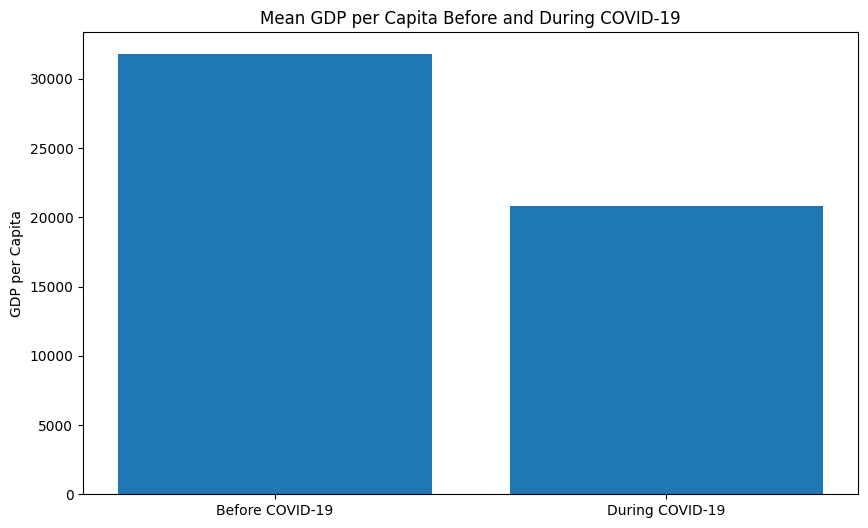

In [ ]:
before_covid = df[df['date'] < '2020-01-01']
during_covid = df[df['date'] >= '2020-01-01']

mean_gdp_before_covid = before_covid['gdp_per_capita'].mean()
median_gdp_before_covid = before_covid['gdp_per_capita'].median()

mean_gdp_during_covid = during_covid['gdp_per_capita'].mean()
median_gdp_during_covid = during_covid['gdp_per_capita'].median()

print(f"Mean GDP per capita before COVID-19: {mean_gdp_before_covid}")
print(f"Median GDP per capita before COVID-19: {median_gdp_before_covid}")
print(f"Mean GDP per capita during COVID-19: {mean_gdp_during_covid}")
print(f"Median GDP per capita during COVID-19: {median_gdp_during_covid}")

plt.figure(figsize=(10, 6))
plt.bar(['Before COVID-19', 'During COVID-19'], [mean_gdp_before_covid, mean_gdp_during_covid])
plt.title('Mean GDP per Capita Before and During COVID-19')
plt.ylabel('GDP per Capita')
plt.show()

As we can see in above visualization,when covid was not started,gdp per capita was at a good standing and during Covid-19 there was a sudden decrease in the GDP per capita.It almost went to almost 30% down then the before covid time.

d)Correlation Between GDPCAP and Human Development Index

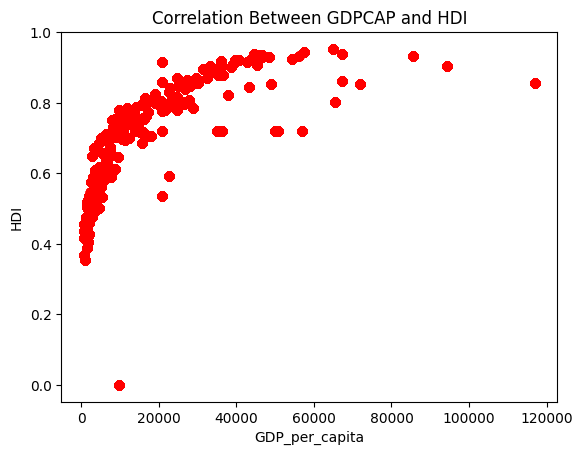

In [ ]:
correlation = df['gdp_per_capita'].corr(df['human_development_index'])
plt.scatter(df['gdp_per_capita'], df['human_development_index'],color='red')
plt.title('Correlation Between GDPCAP and HDI')
plt.xlabel('GDP_per_capita')
plt.ylabel('HDI')
plt.show()


It can be seen that when the gdp was lower,human development index was higher so,gdp per capita and human development index is positively co-related.